In [3]:
# Import necessary libraries
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt

# Step 1: Load the dataset
file_path = 'advertising.csv'
data = pd.read_csv(file_path)



In [5]:
# Step 2: Explore the dataset
print(data.head())
print(data.info())
print(data.describe())



      TV  Radio  Newspaper  Sales
0  230.1   37.8       69.2   22.1
1   44.5   39.3       45.1   10.4
2   17.2   45.9       69.3   12.0
3  151.5   41.3       58.5   16.5
4  180.8   10.8       58.4   17.9
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   TV         200 non-null    float64
 1   Radio      200 non-null    float64
 2   Newspaper  200 non-null    float64
 3   Sales      200 non-null    float64
dtypes: float64(4)
memory usage: 6.4 KB
None
               TV       Radio   Newspaper       Sales
count  200.000000  200.000000  200.000000  200.000000
mean   147.042500   23.264000   30.554000   15.130500
std     85.854236   14.846809   21.778621    5.283892
min      0.700000    0.000000    0.300000    1.600000
25%     74.375000    9.975000   12.750000   11.000000
50%    149.750000   22.900000   25.750000   16.000000
75%    218.825000   36.525000

In [7]:
# Step 3: Check for missing values
print("Missing values:\n", data.isnull().sum())




Missing values:
 TV           0
Radio        0
Newspaper    0
Sales        0
dtype: int64


In [9]:
# Step 4: Define features (X) and target variable (y)
X = data[['TV', 'Radio', 'Newspaper']]  # Features
y = data['Sales']  # Target variable



In [11]:
# Step 5: Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)



In [13]:
# Step 6: Train a linear regression model
model = LinearRegression()
model.fit(X_train, y_train)



LinearRegression()

In [15]:
# Step 7: Make predictions
y_pred = model.predict(X_test)



In [17]:
# Step 8: Evaluate the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Squared Error: {mse}")
print(f"R-squared Score: {r2}")



Mean Squared Error: 2.9077569102710905
R-squared Score: 0.9059011844150826


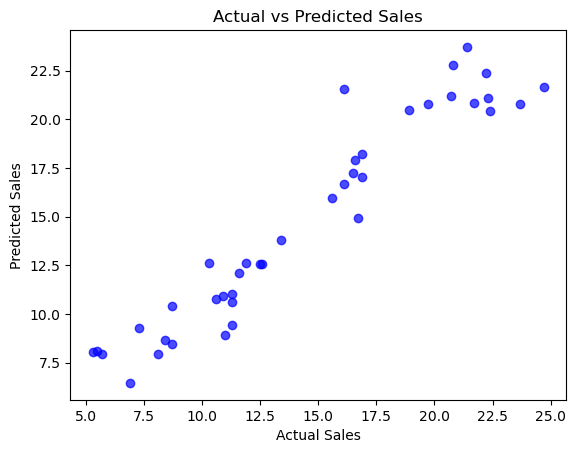

In [19]:
# Step 9: Visualize the results
plt.scatter(y_test, y_pred, alpha=0.7, color='blue')
plt.xlabel("Actual Sales")
plt.ylabel("Predicted Sales")
plt.title("Actual vs Predicted Sales")
plt.show()



In [21]:
# Step 10: Analyze feature importance
coefficients = pd.DataFrame(model.coef_, X.columns, columns=['Coefficient'])
print(coefficients)

           Coefficient
TV            0.054509
Radio         0.100945
Newspaper     0.004337
